In [11]:
#160124450 -> 1001100010110100111000100010
import datetime
from pandas import *
import matplotlib.mlab as mlab
import scipy.signal as signal
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import soundfile as sf
import os

In [12]:
def iguala_tamanho(vet1, vet2):
    n=0
    if(len(vet1)==len(vet2)):
        return
    elif(len(vet1)>len(vet2)):
        while(len(vet1)>len(vet2)):
            vet2.append(vet2[n])
            n=(n+1)%len(vet2)
    else:
        while(len(vet2)>len(vet1)):
            vet1.append(vet1[n])
            n=(n+1)%len(vet1)

def convolucao(vet_1, vet_2):
    aux_1=[]
    aux_2=[]
    resposta=[]
    
    for i in range(len(vet_1)):
        aux_1.append(vet_1[i]) 
    for i in range(len(vet_2)):
        aux_2.append(vet_2[-1-i])   
        
    iguala_tamanho(aux_1,aux_2)
    
    aux_1=list(np.dot(range(len(vet_1)),0))+aux_1
    aux_2=aux_2+list(np.dot(range(len(vet_1)-1),0))
    aux_2.insert(0,0)
    print(len(aux_1))
    for i in range(len(aux_1)-1):
        print(i)
        resposta.append(0)
        resposta[i]=np.dot(aux_1,aux_2)
        del aux_2[len(aux_2)-1]
        aux_2.insert(0,0)

    return resposta;
def calcula_fourier(sinal, fs):
    fourier=2*np.abs(np.fft.fft(sinal)/len(sinal))
    freq=np.fft.fftfreq(len(sinal), d=1/fs)
    return fourier, freq

Text(0.5, 1.0, 'convolução')

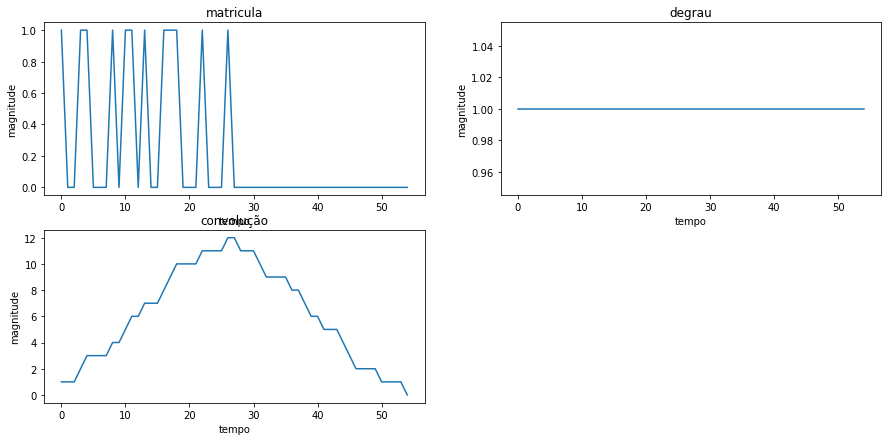

In [31]:
matricula=[1,0,0,1,1,0,0,0,1,0,1,1,0,1,0,0,1,1,1,0,0,0,1,0,0,0,1,0]
degrau=[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
t=range(2*len(matricula)-1)

resposta=convolucao(matricula,degrau)

f=matricula+list(np.dot(range(len(matricula)-1),0))
fdeg=degrau+[1]*(len(degrau)-1)

fig=plt.subplots(figsize=(15,7))
ax1=plt.subplot(2,2,1)
ax1.plot(t,f)
ax1.set_xlabel('tempo')
ax1.set_ylabel('magnitude')
ax1.set_title('matricula')
ax2=plt.subplot(2,2,2)
ax2.plot(t,fdeg)
ax2.set_xlabel('tempo')
ax2.set_ylabel('magnitude')
ax2.set_title('degrau')
ax3=plt.subplot(2,2,3)
ax3.plot(t,resposta)
ax3.set_xlabel('tempo')
ax3.set_ylabel('magnitude')
ax3.set_title('convolução')

Text(0.5, 1.0, 'Resposta no domínio da frequência')

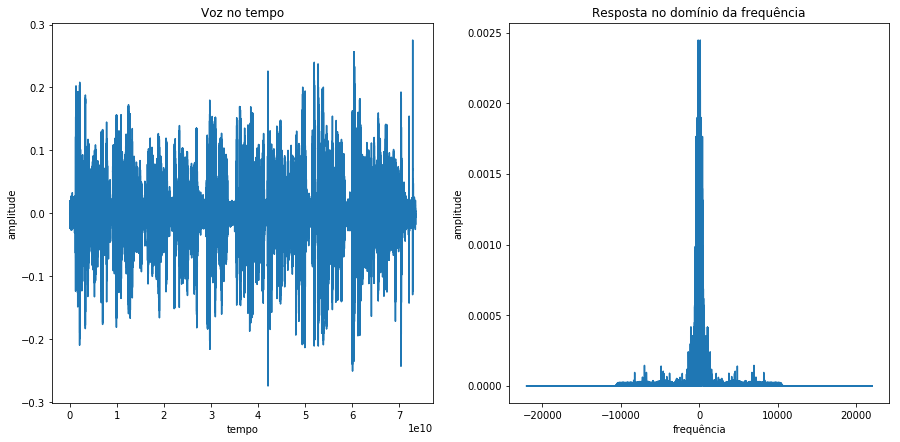

In [58]:
[sinal_voz, fs_voz] = sf.read('audi_voz.wav')

t=range(len(sinal_voz))
t=np.dot(t, fs_voz)

[voz_fourier, freq]=calcula_fourier(sinal_voz, fs_voz)

fig=plt.subplots(figsize=(15,7))



ax1=plt.subplot(1,2,1)
ax1.plot(t, sinal_voz)
ax1.set_xlabel('tempo')
ax1.set_ylabel('amplitude')
ax1.set_title('Voz no tempo')

ax2=plt.subplot(1,2,2)
ax2.plot(freq, voz_fourier)
ax2.set_xlabel('frequência')
ax2.set_ylabel('amplitude')
ax2.set_title('Resposta no domínio da frequência')



Text(0.5, 1.0, 'Convolução-Washing_Machine')

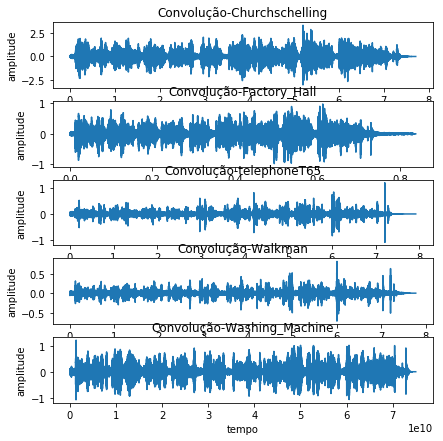

In [67]:
[churchschelling, fs_church]= sf.read('Churchschelling.wav')
[factory_hall, fs_factory]=sf.read('FactoryHall.wav')
[telephoneT65, fs_tel]= sf.read('telephoneT65.wav')
[walkman, fs_walk]= sf.read('walkman.wav')
[washingmachine, fs_wash]= sf.read('Washingmachine.wav')

conv_church=np.convolve(sinal_voz, churchschelling)
conv_factory=np.convolve(sinal_voz, factory_hall)
conv_tel=np.convolve(sinal_voz, telephoneT65)
conv_walk=np.convolve(sinal_voz, walkman)
conv_wash=np.convolve(sinal_voz, washingmachine)

sf.write('voz_church.wav',conv_church, fs_voz)

sf.write('voz_factory.wav',conv_factory, fs_voz)

sf.write('voz_tel.wav',conv_tel, fs_voz)

sf.write('voz_walk.wav',conv_walk, fs_voz)

sf.write('voz_wash.wav',conv_wash, fs_voz)

Text(0.5, 1.0, 'Convolução-Washing_Machine')

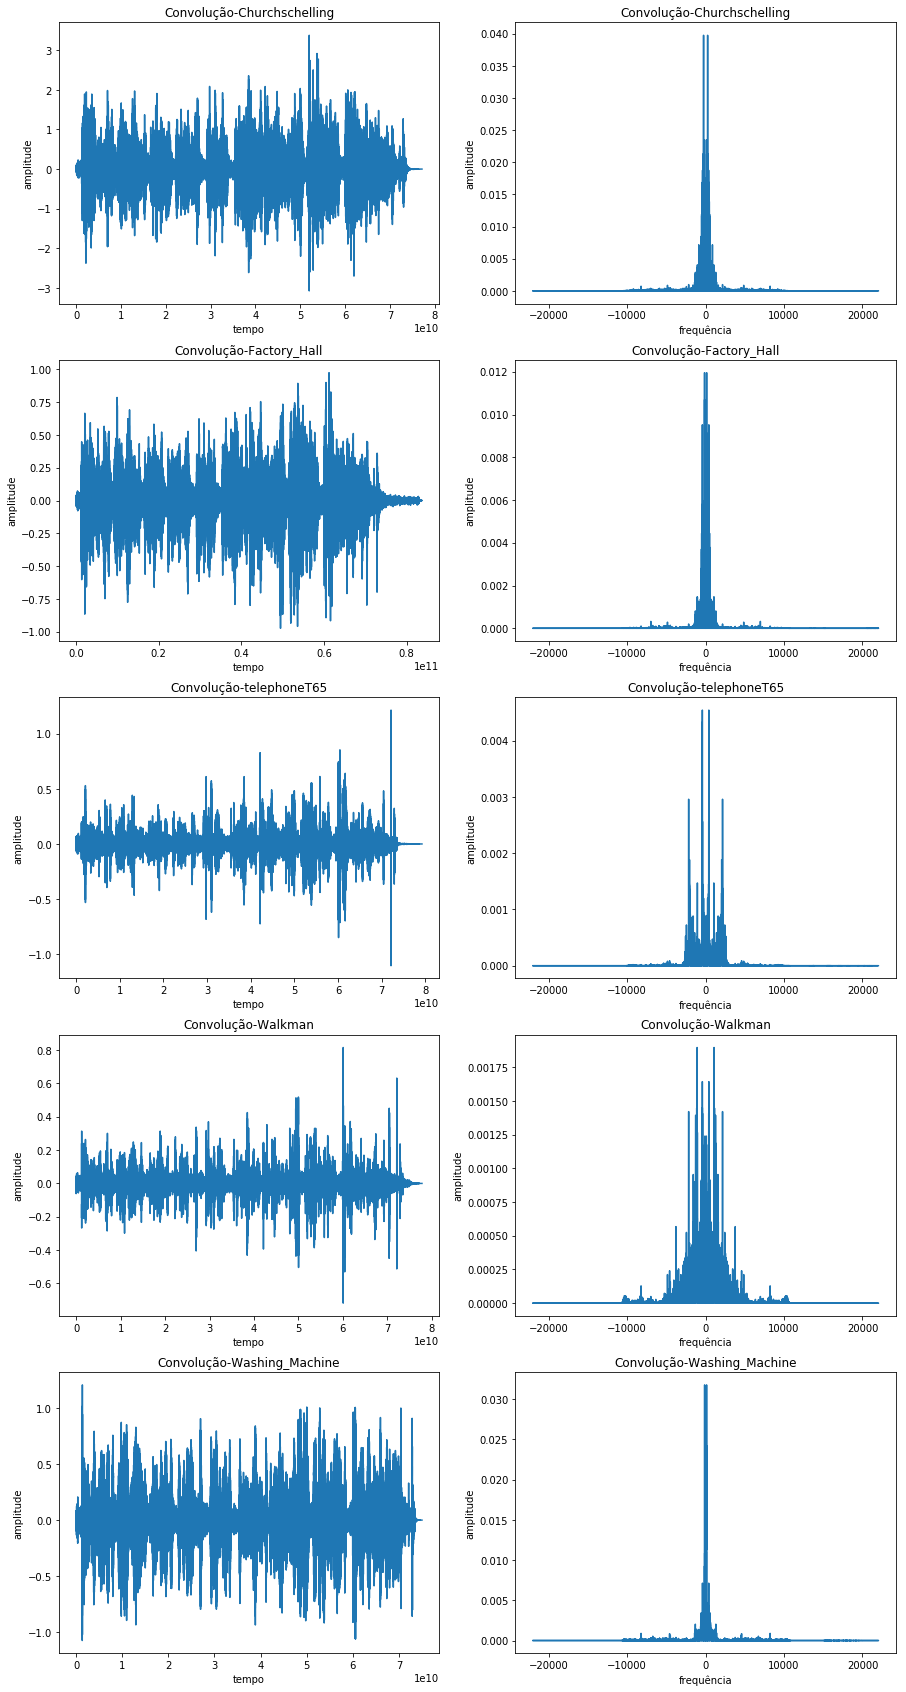

In [71]:
fig=plt.subplots(figsize=(15,30))

t=range(len(conv_church))
t=np.dot(t, fs_voz)
ax1=plt.subplot(5,2,1)
ax1.plot(t, conv_church)
ax1.set_xlabel('tempo')
ax1.set_ylabel('amplitude')
ax1.set_title('Convolução-Churchschelling')

t=range(len(conv_factory))
t=np.dot(t, fs_voz)
ax2=plt.subplot(5,2,3)
ax2.plot(t, conv_factory)
ax2.set_xlabel('tempo')
ax2.set_ylabel('amplitude')
ax2.set_title('Convolução-Factory_Hall')

t=range(len(conv_tel))
t=np.dot(t, fs_voz)
ax3=plt.subplot(5,2,5)
ax3.plot(t, conv_tel)
ax3.set_xlabel('tempo')
ax3.set_ylabel('amplitude')
ax3.set_title('Convolução-telephoneT65')

t=range(len(conv_walk))
t=np.dot(t, fs_voz)
ax4=plt.subplot(5,2,7)
ax4.plot(t, conv_walk)
ax4.set_xlabel('tempo')
ax4.set_ylabel('amplitude')
ax4.set_title('Convolução-Walkman')

t=range(len(conv_wash))
t=np.dot(t, fs_voz)
ax5=plt.subplot(5,2,9)
ax5.plot(t, conv_wash)
ax5.set_xlabel('tempo')
ax5.set_ylabel('amplitude')
ax5.set_title('Convolução-Washing_Machine')

[fft_conv_church, freq_church]=calcula_fourier(conv_church, fs_church)
[fft_conv_factory, freq_factory]=calcula_fourier(conv_factory, fs_factory)
[fft_conv_tel, freq_tel]=calcula_fourier(conv_tel, fs_tel)
[fft_conv_walk, freq_walk]=calcula_fourier(conv_walk, fs_walk)
[fft_conv_wash, freq_wash]=calcula_fourier(conv_wash, fs_wash)

ax1=plt.subplot(5,2,2)
ax1.plot(freq_church, fft_conv_church)
ax1.set_xlabel('frequência')
ax1.set_ylabel('amplitude')
ax1.set_title('Convolução-Churchschelling')

ax2=plt.subplot(5,2,4)
ax2.plot(freq_factory, fft_conv_factory)
ax2.set_xlabel('frequência')
ax2.set_ylabel('amplitude')
ax2.set_title('Convolução-Factory_Hall')

ax3=plt.subplot(5,2,6)
ax3.plot(freq_tel, fft_conv_tel)
ax3.set_xlabel('frequência')
ax3.set_ylabel('amplitude')
ax3.set_title('Convolução-telephoneT65')

ax4=plt.subplot(5,2,8)
ax4.plot(freq_walk, fft_conv_walk)
ax4.set_xlabel('frequência')
ax4.set_ylabel('amplitude')
ax4.set_title('Convolução-Walkman')

ax5=plt.subplot(5,2,10)
ax5.plot(freq_wash, fft_conv_wash)
ax5.set_xlabel('frequência')
ax5.set_ylabel('amplitude')
ax5.set_title('Convolução-Washing_Machine')